<a href="https://colab.research.google.com/github/FaizAlana03/CatCares_ML/blob/main/Ringworm_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
from google.colab import drive
import pathlib
#import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

# Download the dataset
drive.mount('/content/gdrive')
data_dir = "gdrive/My Drive/Dataset Images"
data_dir = pathlib.Path(data_dir)
print(data_dir)

Mounted at /content/gdrive
gdrive/My Drive/Dataset Images


In [ ]:
train_dir = os.path.join(data_dir, 'Training')
test_dir = os.path.join(data_dir, 'Test')

In [ ]:
train_fnames = os.listdir( train_dir )
test_fnames = os.listdir( test_dir )

print(train_fnames[:10])


['1t_png.rf.cc0bb02cf74fbaaf3c5eefd641dba285.jpg', '32qu_png.rf.f91ffbf4b6178fa09d53c6585a2a377b.jpg', '35q_png.rf.81dc4710967af7246f344ccbdfe58539.jpg', '11a_png.rf.ae89867ce2a64963cba1c795f85b2310.jpg', '32qt_png.rf.5df2a6de5d7691631e63ecf8bb16fe1e.jpg', '2o_jpg.rf.ecf2f7950715c57332a348d0baa3d2dc.jpg', '42_PNG.rf.14b58fe2c104f9ae37f052911f0b7bc9.jpg', '33q_png.rf.3c5e04e84d4a0498d25589ae72e9fb0a.jpg', '2a_png.rf.d7d9c29548c743149e690f5face0b2af.jpg', '4k_png.rf.85ac6748b4052c413415b4946f0cd1ca.jpg']


In [ ]:
print('total training ringworm images :', len(os.listdir(      train_dir ) ))

print('total test ringworm images :', len(os.listdir( test_dir ) ))


total training ringworm images : 455
total test ringworm images : 101


In [ ]:
  '''Creates a CNN with 4 convolutional layers'''
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])

 # return model


In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        data_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generatorv
test_generator = test_datagen.flow_from_directory(
        data_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 553 images belonging to 2 classes.
Found 553 images belonging to 2 classes.


In [ ]:
history = model.fit(
        train_generator,
        steps_per_epoch=8,
        epochs=50,
        verbose=1,
        validation_data = test_generator,
        validation_steps=8)

Epoch 1/50
8/8 [==============================] - 37s 3s/step - loss: 0.5835 - accuracy: 0.8000 - val_loss: 0.4822 - val_accuracy: 0.8375
Epoch 2/50
8/8 [==============================] - 11s 2s/step - loss: 0.5294 - accuracy: 0.8062 - val_loss: 0.4381 - val_accuracy: 0.8438
Epoch 3/50
8/8 [==============================] - 5s 618ms/step - loss: 0.4378 - accuracy: 0.8625 - val_loss: 0.4922 - val_accuracy: 0.8125
Epoch 4/50
8/8 [==============================] - 5s 654ms/step - loss: 0.4339 - accuracy: 0.8562 - val_loss: 0.4149 - val_accuracy: 0.8625
Epoch 5/50
8/8 [==============================] - 6s 882ms/step - loss: 0.5012 - accuracy: 0.8105 - val_loss: 0.4697 - val_accuracy: 0.8188
Epoch 6/50
8/8 [==============================] - 3s 422ms/step - loss: 0.4512 - accuracy: 0.8438 - val_loss: 0.3904 - val_accuracy: 0.8750
Epoch 7/50
8/8 [==============================] - 3s 380ms/step - loss: 0.4389 - accuracy: 0.8500 - val_loss: 0.5299 - val_accuracy: 0.7812
Epoch 8/50
8/8 [========

In [ ]:
import numpy as np
#from keras.preprocessing import image
import keras.utils as image
#from tensorflow.keras.utils import load_img
from google.colab import files
#from tensorflow.keras.preprocessing.image import img_to_array, load_img

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " Ringworm")
  else:
    print(fn + " Not Ringworm")

Saving holahop 1.jpg to holahop 1 (1).jpg
Saving holahop 2.jpg to holahop 2 (1).jpg
Saving luka kering.jpeg to luka kering (1).jpeg
Saving mixue.jpg to mixue (1).jpg
Saving muka 1.jpg to muka 1 (1).jpg
Saving muka 2.jpg to muka 2 (1).jpg
Saving muka 3.jpg to muka 3.jpg
Saving ringworm 1.jpg to ringworm 1.jpg
Saving ringworm 2.jpg to ringworm 2.jpg
Saving ringworm 3.jpg to ringworm 3.jpg
Saving sakura 1.jpg to sakura 1 (1).jpg
Saving sakura 2.jpg to sakura 2 (1).jpg
Saving scabs on cat 1.jpg to scabs on cat 1 (1).jpg
Saving strawberry.jpg to strawberry (1).jpg
1/1 [==============================] - 0s 28ms/step
[0.]
holahop 1.jpg Not Ringworm
1/1 [==============================] - 0s 32ms/step
[0.]
holahop 2.jpg Not Ringworm
1/1 [==============================] - 0s 29ms/step
[0.]
luka kering.jpeg Not Ringworm
1/1 [==============================] - 0s 27ms/step
[0.]
mixue.jpg Not Ringworm
1/1 [==============================] - 0s 30ms/step
[0.]
muka 1.jpg Not Ringworm
1/1 [=============

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

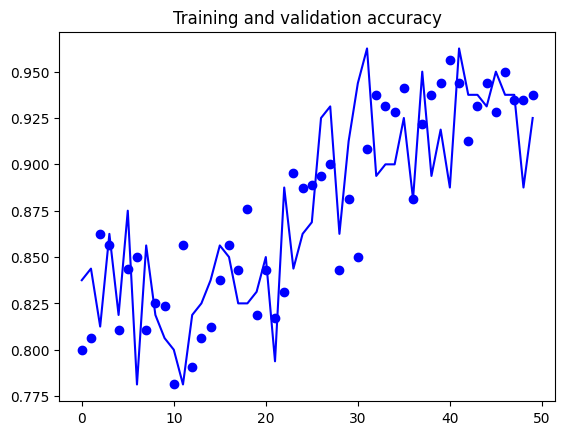

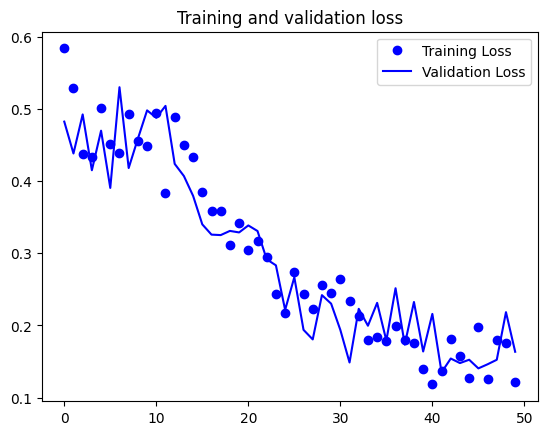

In [ ]:
plot_loss_acc(history)

In [ ]:
from google.colab import files
model.save('my_model')

!zip -r /content/my_model.zip /content/my_model
files.download('/content/my_model.zip')

updating: content/my_model/ (stored 0%)
updating: content/my_model/variables/ (stored 0%)
updating: content/my_model/variables/variables.data-00000-of-00001 (deflated 8%)
updating: content/my_model/variables/variables.index (deflated 61%)
updating: content/my_model/assets/ (stored 0%)
updating: content/my_model/keras_metadata.pb (deflated 92%)
updating: content/my_model/fingerprint.pb (stored 0%)
updating: content/my_model/saved_model.pb (deflated 88%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save('my_model.h5')

In [ ]:
files.download('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>